# Scratch file for developing vivarium-comets

## Run COMETS from COMETSpy for just one square

In [7]:
import cometspy as c
import cobra
import matplotlib.pyplot as plt

In [9]:
# Check the cobra version
print(cobra.__version__)

0.22.1


### Create a layout for the simulation

In [3]:
# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose
test_tube.set_specific_metabolite('glc__D_e', 0.011)

# Add infinite amount of oxygen
test_tube.set_specific_metabolite('o2_e', 1000)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

building empty layout model
models will need to be added with layout.add_model()


### Load a model

In [10]:
# create the model using CobraPy functionality
e_coli_cobra = cobra.test.create_test_model('textbook')
# use the loaded model to build a comets model
# Translate the cobra format into the comets format
e_coli = c.model(e_coli_cobra)

# remove the bounds from glucose import (will be set dynamically by COMETS)
# The bounds will be over written by the Michaelis-Menten kinetics
# By default the bounds are 0 and 1000, can cause problems
e_coli.change_bounds('EX_glc__D_e', -1000, 1000)
e_coli.change_bounds('EX_ac_e', -1000, 1000)

# set the model's initial biomass
# First two numbers are the x & y coordinates of the COMETS 2D grid
# COMETS uses 0 indexing, so 0 0 is the first square
e_coli.initial_pop = [0, 0, 5e-6]

# add it to the test_tube
test_tube.add_model(e_coli)

Using license file /usr/local/gurobi/gurobi.lic
Set parameter TokenServer to value sccsvc


### Set the simulation parameters

In [11]:
# Set the parameters that are different from the default
sim_params = c.params()

# Parameters of the uptake reactions
# Default values will be applied to all uptake reactions
# You can set the parameters for each model, but here we just have one model so setting for all the models is the same
sim_params.set_param('defaultVmax', 18.5)
# sim_params.set_param('defaultKm', 0.000015)
# Make Km much bigger, controls how 
sim_params.set_param('defaultKm', 0.000015)

# How many time steps in total are we running
sim_params.set_param('maxCycles', 1000)

# How long is each step
# Accuracy of the solution will depend on how big the time step is
sim_params.set_param('timeStep', 0.01)

# Size of the spatial box
# Unit is in cm
# Here we will have a volume of 1 mL
sim_params.set_param('spaceWidth', 1)

sim_params.set_param('maxSpaceBiomass', 10)

# Don't bother doing FBA where the biomass is really small
sim_params.set_param('minSpaceBiomass', 1e-11)

# Write the media so we can see how the media changes over time
sim_params.set_param('writeMediaLog', True)

### Run the simulation

In [12]:
# Define an experiment
experiment = c.comets(test_tube, sim_params)

In [13]:
experiment.run()


Running COMETS simulation ...
Done!


### Plot the results

#### Plot the biomass

Text(0, 0.5, 'Biomass (gr.)')

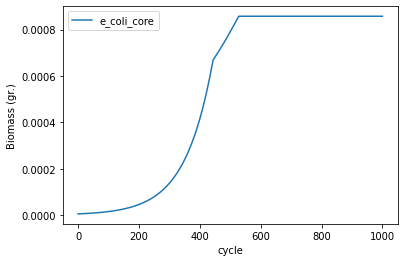

In [14]:
# Plot the biomass
ax = experiment.total_biomass.plot(x = 'cycle')
ax.set_ylabel("Biomass (gr.)")

#### Plot the metabolites

Text(0, 0.5, 'Concentration (mmol)')

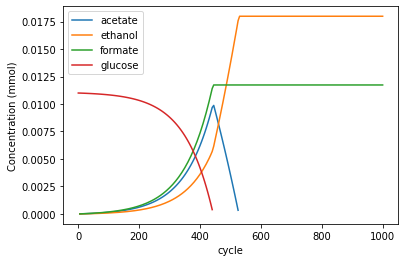

In [15]:
# Look the matbolites
# Only look at things less than 900 so that you don't see the infinite things, only look at thigs that are secreted
media = experiment.media.copy()
media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','ethanol', 'formate', 'glucose'))
ax.set_ylabel("Concentration (mmol)")

## Pull out the results I need for that square

## Make a Vivarium Process

## Run the Vivarium Process